# 图 (看着玩玩)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
from matplotlib.animation import FuncAnimation
import os
path = os.path.abspath('.')
print(path)

c:\Users\的\OneDrive\桌面\mathmatical_code\chapters


## 最小生成树

部分由chat-gpt生成

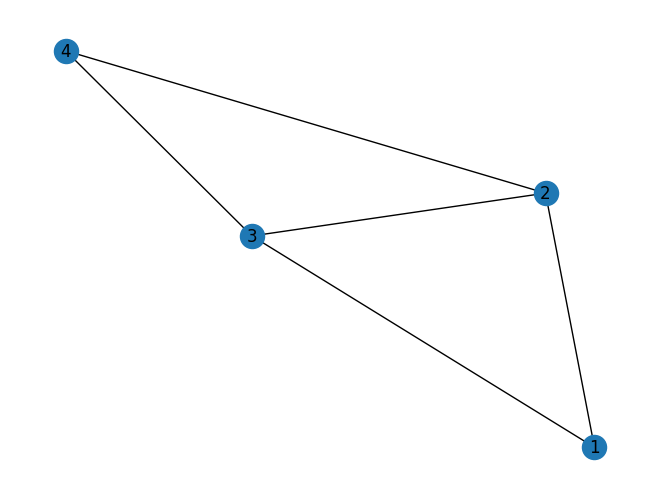

In [2]:
# Step 1: 构建图的数据结构
G = nx.Graph()
edges = [(1, 2, 3), (1, 3, 2), (2, 3, 4), (2, 4, 1), (3, 4, 5)]
G.add_weighted_edges_from(edges)

nx.draw(G, with_labels=True)

In [3]:
# Step 2: 应用最小生成树算法
mst_edges = nx.minimum_spanning_edges(G, algorithm='prim', data=False)
mst = nx.Graph(list(mst_edges))

# Step 3: 可视化
# 创建动态网络可视化对象
# nt = Network(notebook=True)
nt = Network(notebook=True, cdn_resources='local')  # 

In [4]:
# 添加原始图的节点和边
for node in G.nodes():
    nt.add_node(node)

for edge in G.edges():
    nt.add_edge(edge[0], edge[1])

# 展示原始图
nt.show(os.path.join(path, 'attachments', 'original_graph.html'), notebook=False) ## 报错：UnicodeEncodeError: 'gbk' codec can't encode character '\xa9' in position 230710: illegal multibyte sequence
# 解决：https://stackoverflow.com/questions/75596534/in-pyvis-i-get-unicodeencodeerror-charmap-codec-cant-encode-characters-in-po

# html = nt.generate_html()
# with open("original_graph.html", mode='w', encoding='utf-8') as fp:
#         fp.write(html)
# display(HTML(filename='original_graph.html')) # 不正常的显示，可使用浏览器打开.html

c:\Users\的\OneDrive\桌面\mathmatical_code\chapters\attachments\original_graph.html


In [5]:
# 添加最小生成树的节点和边，并用动态效果展示生成过程
nt_bfs = Network()

for node in G.nodes():
    nt_bfs.add_node(node)

for edge in mst.edges():
    nt_bfs.add_edge(edge[0], edge[1])

nt_bfs.show_buttons(filter_=['nodes', 'edges', 'physics'])
nt_bfs.show(os.path.join(path, 'attachments', 'minimum_spanning_tree.html'), notebook=False)

c:\Users\的\OneDrive\桌面\mathmatical_code\chapters\attachments\minimum_spanning_tree.html


In [6]:
%matplotlib qt5
fig, ax = plt.subplots()
g_pos=nx.spring_layout(G)
only_nodes = nx.Graph()
only_nodes.add_nodes_from(G.nodes)
# nx.draw(only_nodes, pos=g_pos)
nx.draw(G, pos=g_pos, edge_color='lightgreen')
def update(frame):
    edges_to_draw = list(mst.edges())[:frame + 1]
    nx.draw_networkx_edges(only_nodes, pos=g_pos, edgelist=edges_to_draw, edge_color='black')

ani = FuncAnimation(fig, update, frames=len(list(mst.edges())), interval=500, repeat=False)

## 最短路径

In [17]:
os.chdir(os.path.dirname(path))
from datastructure.graph.directedgraph import SPDiGraph, DirectedGraph, DirectedEdge, Node
from datastructure.interator import IterQueue, brofir_iter_plus
os.chdir(path)
def bellman_ford_shortest_path(graph: SPDiGraph, node: Node):
        assert node in graph.digraph.nodes
        q, V, i, cycle_in = IterQueue([node, None]), graph.digraph.V, 0, []
        def relax(nd: Node | None):
            nonlocal i, V, cycle_in
            if nd == None:
                i += 1
                return [None] if not q.empty() else [] # None 标志下一轮的开始和上一轮结束
            if i == V:
                cycle_in = q.pop_queue() # 清空队列结束
                return []
            return relaxnodes if (relaxnodes := graph.node_relax(nd)) else []
        def added(nd: Node | None, qe: IterQueue):  # 将不在队列中的节点加入队列
            if nd == None:
                return (True, None) # 下一轮的开始
            return (False, None) if nd in qe.get_queue() else (True, nd)
        for node in brofir_iter_plus(q, relax, added, q):  # 广度搜素
            pass
        return cycle_in, i  # 队列还有没剩, 第几轮结束

试分析用迭代实现的这种算法带来的扩展性方面的优越性 :)

并稍加修改，利用该函数完成动态绘图 :D

In [18]:
from datastructure.show.graph import draw_graph_with_labels
# 参考答案
def bellman_ford_shortest_path(graph: SPDiGraph, node: Node):
        assert node in graph.digraph.nodes
        q, V, i, cycle_in = IterQueue([node, None]), graph.digraph.V, 0, []
        def relax(nd: Node | None):
            nonlocal i, V, cycle_in
            if nd == None:
                i += 1
                return [None] if not q.empty() else []
            if i == V:
                cycle_in = q.pop_queue() # 结束
                return []
            return relaxnodes if (relaxnodes := graph.node_relax(nd)) else []
        def added(nd: Node | None, qe: IterQueue):  # 将不在队列中的节点加入队列
            if nd == None:
                return (True, None)
            return (False, None) if nd in qe.get_queue() else (True, nd)
        for node in brofir_iter_plus(q, relax, added, q):  # 广度搜素
            yield node ####只改这两处, '生成器' 返回节点或None
        yield cycle_in, i  # 队列还有没剩, 第几轮结束 返回元组

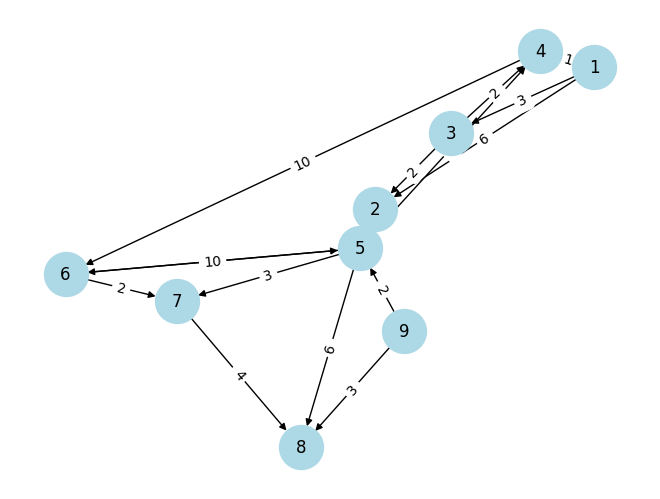

In [4]:
g = DirectedGraph()
g.add_nodes(range(1, 10))
g.add_edges([DirectedEdge(*t) for t in [(1,2,6), (1,3,3),(1,4,1),(2,5,1),(3,2,2),(3,4,2),
                                        (4,6,10),(5,4,6),(5,6,4),(5,7,3),(5,8,6),(6,5,10),
                                        (6,7,2),(7,8,4),(9,5,2),(9,8,3)]])
G2 = draw_graph_with_labels(g)

In [16]:
%matplotlib qt5
fig2, ax2 = plt.subplots()
spg = SPDiGraph(g, 1)
spg_pos=nx.kamada_kawai_layout(G2, weight='weight')

# 绘制带有权重的图，边的长度根据权重来设置
edge_labels = {(u, v): d['weight'] for u, v, d in G2.edges(data=True)}
nx.draw(G2, spg_pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=12, edge_color='lightgreen')
nx.draw_networkx_edge_labels(G2, spg_pos, edge_labels=edge_labels, font_size=10)

node_or_end = bellman_ford_shortest_path(spg, spg.start)
edges_for_hightlight = []
# 前面都是准备工作
def dynamic_draw_sp(frame):
    global edges_for_hightlight
    if isinstance((item := next(node_or_end)), tuple):
        return None
    if item == None:
        nx.draw_networkx_edges(G2, pos=spg_pos, edgelist=edges_for_hightlight, edge_color='lightgreen')
        edges_for_hightlight = []
    if (edge := spg.edge_to(item)):
        edges_for_hightlight.append((edge.from_nd, edge.to_nd, edge.weight))
        print(item, edges_for_hightlight)
        nx.draw_networkx_edges(G2, pos=spg_pos, edgelist=edges_for_hightlight, edge_color='red')

ani = FuncAnimation(fig2, dynamic_draw_sp, frames=100, interval=500, repeat=True)

2 [(1, 2, 6)]
3 [(1, 2, 6), (1, 3, 3)]
4 [(1, 2, 6), (1, 3, 3), (1, 4, 1)]
5 [(2, 5, 1)]
2 [(2, 5, 1), (3, 2, 2)]
6 [(2, 5, 1), (3, 2, 2), (4, 6, 10)]
7 [(5, 7, 3)]
8 [(5, 7, 3), (5, 8, 6)]
5 [(5, 7, 3), (5, 8, 6), (2, 5, 1)]
6 [(5, 6, 4)]
7 [(5, 6, 4), (5, 7, 3)]
8 [(5, 6, 4), (5, 7, 3), (5, 8, 6)]


## 最小费用最大流 / 运输问题

可通过线性规划解决, 也可以通过图的算法解决

### 运输问题

- 产销平衡且确定

In [28]:
import numpy as np
import pandas as pd
c = np.array([[3, 11, 3, 10],  # c[i, j] 为从A_i到B_j的单位运费
              [1, 9, 2, 8],
              [7, 4, 10, 5]])
sales_volume = np.array([3, 6, 5, 6]) # B_j销量
production = np.array([7, 4, 9])  # A_i产量

assert np.sum(production) == np.sum(sales_volume) == 20

# 拼接 ...
d = np.vstack((c, sales_volume))
dd = (np.hstack((production, [sum(production)])))
ddd = np.concatenate((d, dd.reshape(4, 1)), axis=1) 
col = ['B1', 'B2', 'B3', 'B4', '产量']
idx = ['A1', 'A2', 'A3', '销量']

df = pd.DataFrame(ddd, idx, col)
display(df)

,B1,B2,B3,B4,产量
A1,3,11,3,10,7
A2,1,9,2,8,4
A3,7,4,10,5,9
销量,3,6,5,6,20


[线性规划解法](./Linear_Programming.ipynb)

- 产销不平衡
- 产销不确定

以上这些都是两点之间的运输, 如果加上中转点，再加个虚拟的终点，就变成了经典的流量问题

### 最小费用最大流
[bilibili最小费用最大流](https://www.bilibili.com/video/BV1QC4y1a7KY/?spm_id_from=333.880.my_history.page.click&vd_source=0aa11dd1f6427f182264b35b09d2287f)

先看完这个视频

所以你可以发现, 关键在于以什么方式去找一条从起点到终点的路径, 最大流要求不断地找一条增广路, 直到找不到为止, 而最小费用则要求这条增广路是所有可行增广路中最短的

现在不关心增广路或者最短增广路怎么找的, 就假设有这么一个函数能够返回这条路径, 我们需要做的就是不断迭代, 用最短路径那一节中提到的迭代的思路拼积木解决这个问题

这里不打算实现这个算法